# 1. Expresses the central motivation of the project in one or two sentences. This may evolve a bit through the project.

During this project, we want to be able to artificially generate a visual representation of sound-to-color synesthesia, a condition in which an individual sees colors in response to hearing specific noises. By translating frequencies into colors, we wish to create a program that can generate colors based on an inputted song. We can do this by training on a data set with .wav signals from a simple piano performance that are paired with color.

# Visualization 1

In [9]:
import pandas as pd

df = pd.read_csv('notes_freqs.csv')
df = df.dropna()

df.head(130)

,Note Name,Octave,Frequency (Hz),Wavelength (M)*,Color
0,C,0,16.351,20.812,red
1,C# / Db,0,17.324,19.643,orange
2,D,0,18.354,18.540,yellow
3,D# / Eb,0,19.445,17.500,lawngreen
4,E,0,20.601,16.518,darkgreen
...,...,...,...,...,...
115,G,9,12543.856,0.027,mediumpurple
116,G# / Ab,9,13289.752,0.026,purple
117,A,9,14080.000,0.024,pink
118,A# / Bb,9,14917.240,0.023,saddlebrown


In [11]:
notes = list(df.loc[:, 'Note Name'].unique())
notes_dict = {}

In [12]:
for note in notes:
    wavelengths = []
    frequencies = []
    for idx in range(len(df)):
        if df.loc[idx, 'Note Name'] == note:
            wavelength = df.loc[idx ,'Wavelength (M)*']
            wavelengths.append(wavelength)
            freq = df.loc[idx ,'Frequency (Hz)']
            frequencies.append(freq)
    notes_dict[note] = [wavelengths, frequencies]

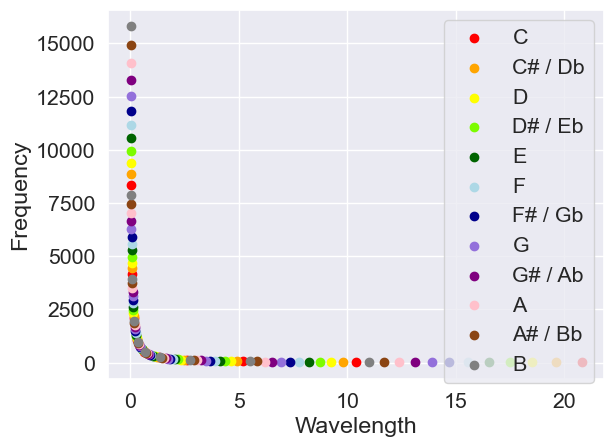

In [13]:
colors = ['red', 'orange', 'yellow', 'lawngreen', 'darkgreen', 'lightblue', 'darkblue', 'mediumpurple', 'purple', 'pink', 'saddlebrown', 'gray']
count = 0
for key in notes_dict.keys():
    plt.scatter(notes_dict[key][0], notes_dict[key][1], color = colors[count], label = key)
    count += 1
plt.xlabel('Wavelength')
plt.ylabel('Frequency')
plt.legend()

# Visualization 1
Through visualization 1, we plan to show the relationship between frequency, wavelength, and a musical note. We have found models representing the relationship between heard musical notes and colors that a person with synthesia may experience. By using the data shown in this model, we can predict the note of a sound based on the wavelength or frequency of the audio, then model that sound as a color, representing how someone with synthesia may perceive colors from an audio as the audio progresses.

# Visualization 2

/var/folders/lk/g6tp_z_d4vd9qk_j7tqfsc6h0000gn/T/ipykernel_13747/992889223.py:33: WavFileWarning: Reached EOF prematurely; finished at 9809999 bytes, expected 4294967303 bytes from header.
  rate, x = wavfile.read(str(file))


sound being graphed:


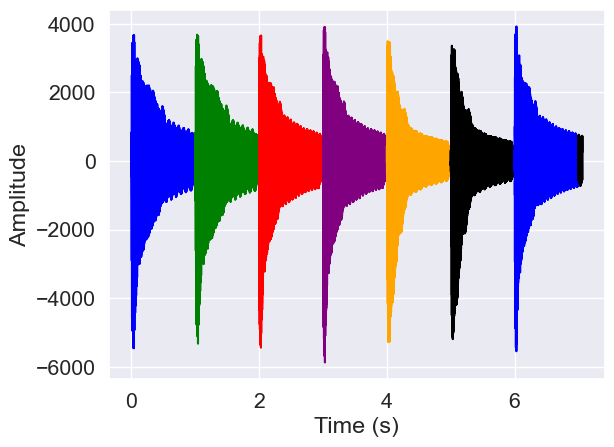

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.io import wavfile
from IPython.display import display, Audio

sns.set(font_scale=1.4)


##############sound class, copied but significantly modified from lab 4
class Sound:
    """ a sound, can be played, volume adjusted or appended

    Attributes:
        x (np.array): an array representing the sound. either
            1d (mono) or 2d (stereo) (see note above)
        rate (int): frequency, in hertz, that the signal x
            should be played at
    """

    def __init__(self, x, rate):
        self.x = x.astype(np.int16)
        self.rate = rate

    @classmethod
    def from_wav_file(cls, file):
        """ loads sound from a Wav file
        
        Args:
            file (str): file name (needn't have full path if
                file is in same folder as this ipynb)
        """
        rate, x = wavfile.read(str(file))
        return Sound(x=x, rate=rate)

    def build_jupyter_player(self):
        """ builds and displays jupyter player of sound """
        display(Audio((self.x[:, 0], self.x[:, 1]), 
                      rate=self.rate))
    
    def plot(self, cutoffs=None, colors=None):
        """produces a graph of the audio signal
        
        Args:
            cutoffs (list of floats): values at which to change the color
            colors (list of str): corresponding colors for each section
        
        """
        ##############################
        '''Deleting right channel for mono sound - this is a hacky way of doing this, but it works for now.'''
        self.x = self.x[:, 0]
        #FIXME: This line prevents .plot() from working multiple times as it keeps deleting the channel again and again.
        ##############################


        # set up time index array - this is a more accurate way to plot the signal as it would incorporate the rate (thx stackoverflow)
        time = np.arange(len(self.x)) / float(self.rate)
        
        if cutoffs is None:
            # if no cutoffs are provided, plot the whole signal in one color
            plt.plot(time, self.x)

        else:
            # plot each section of the signal with its own color
            if colors is None:
                colors = ['blue', 'green', 'red', 'purple', 'orange', 'black']
            colors = colors[:len(cutoffs) + 1]  # make sure we have enough colors
            
            start = 0
            for i, cutoff in enumerate(cutoffs):
                end = int(cutoff * self.rate)
                plt.plot(time[start:end], self.x[start:end], color=colors[i % len(colors)])
                start = end
                #end and start are used to plot the sections with different colors (shoutout to vedant from uw for this)
            
            # plot the last section
            plt.plot(time[start:], self.x[start:], color=colors[-1])
        
        # add labels and legend
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude') #this seems to be the more accurate way of saying this?




####################
# build a sound
thud = Sound.from_wav_file(file='twinkle_twinkle.wav')

###### copied from Alina's code in Visual 2 - below. Deletes the blank space before the song starts
song_arr = thud.x

i = 0
stopping_idx = 0
#changes size and shape of the array to only include the song
while i < song_arr.shape[0]:
    x, y = song_arr[i, 0], song_arr[i, 1]
    if ((song_arr[i-1, 0] != 0) and (song_arr[i-1, 1] != 0)) and ((song_arr[i+1,0] != 0) and (song_arr[i+1,1] != 0)):
        stopping_idx = i-1
        break
    i += 1
stopping_idx

edited_song = np.random.randint(1, size=(song_arr.shape[0] - stopping_idx, 2))

#deletes the blank space before the song starts
j = stopping_idx
k = 0
while j < song_arr.shape[0] - stopping_idx: 
    edited_song[k] = song_arr[j]
    j += 1
    k += 1

thud.x = edited_song

###### everything above this line is copied from Alina's code in Visual 2

#very archaic method of getting one single sentence out of the song - only would work on twinkle twinkle little star
edit = thud.x
edit_size = (edit.size)/2
ed = int(edit_size/7)
edit = edit[:ed]
thud.x = edit


print('sound being graphed:')
thud.build_jupyter_player()

thud.plot(cutoffs=[1,2,3,4,5,6,7])

# Visualization 2
Through visualization 2 we are represented a basic version of what we intend our final project to produce -- a color varying plot over time based on characteristics of the noise being plotted. Though this visualization is created based on colors that are hard coded to corresponded to different sounds through a pre-made array, we intend to later have the color of the waveform be predicted by our program based on characteristics of the frequency and amplitude of the given waveform, creating a visualization with more diverse colors and waves representing what an individual with synthestia may experience while listening to music. The updated plot function that produced the visualization allows the user to to plot the song in different colors based off of where they set the cuttofs. If no cutoffs are provided, the whole song is plotted in one color. If no colors are provided, the default colors are used. The colors are cycled through if there are more cutoffs than colors.

# 3. Discuss what ML tools will be used. Its expected that many (most) analyses will fail to produce the results you’re after. Be sure that your ML plans are flexible:

We plan on trying to use both KMeans Clustering and KNN Classifying in order to pair a sound wave with a note. Our strategy through KMeans Clustering would be to take the frequency of various noises made throughout the audio file being analyzed and cluster those frequencies to the note with the nearest frequency. Based on which note each sound is closest to, it will be assigned a color when it is plotted. We plan on using KNN Classifying to accomplish a similar goal, where sounds are classified to a note based on the characteristic of their frequencies. By classifying each sound to a note, a color can then be assigned to the sound based on the note the sound was predicted to represent.

Our goal is to be able to map colors to sounds in a complex song in which multiple instruments and frequencies are present, but this will likely prove challenging as individual components must be stripped from the complicated audio into a simplier audio in order to be analyzed. If this proves too challenging and is not a skill we have learned/can learn, we plan to use only audio files that have individual components, such as a simple piano melody.